# **Proyecto Integrador de MLOps**

## **1.Introduccion**

Steam es una plataforma de distribución digital de videojuegos desarrollada por Valve Corporation.
Esta plataforma actualmente tiene casi 20 años en el mercado ,y su principal objetivo es permitir unificar y distribuir videojuegos ,tanto de forma gratuita como de pago,adicionalmente cuenta con servidores de emparejamiento, transmisiones de vídeo y servicios de redes sociales.

Steam el cual es la empresa donde empezaste a trabajar en el area de proyectos de Data ,Solicito la labor al area de **Data Science** al cual usted pertence,
como  tarea elaborar un MVP de su primer  proyecto de Data Science  en el mundo laboral el cual pondra a prueba sus habilidades ,Steam requiere que elabores un sistema de recomendacion de videojuegos para usuarios.

 Usted debe encargarse de elaborar un  de sistema de recomendación de videojuegos para usuarios  ,realizar las transformaciones correspondientes , feature engineering ,desarrolloar un API y unas funciones que se consumiran en el API y se realizara el deploy correspondiente .

* Contexto analítico. Como parte del proyecto de Data Science se le entrego los los siguientes datos ya se han recopilado y están en completa disposcion de uso para usted:
En esta ocasion se uso un dataset sobre la informacion de juegos de Steam en la comunidad australiana.
los 3 set de datos que se nos muestra acontinuacion :
- •steam_games.json
- •user_review.json
- •user_items.json

Este notebook resume los resultados del desarrollo de mi primer proyecto enfocado en **Data Engineering y MLOps**.


## **2.Cargando las librerías necesarias**

In [ ]:
import pandas as pd #Cargaremos pandas para manejar los datos",
import numpy as np #Cargaremos numpy para manejar los datos,
import json as json  #Cargaremos json para manejar los datos",
import gzip #Cargaremos gzip para manejar los datos,
import ast #Cargaremos ast para manejar los datos",
import matplotlib.pyplot as plt  #Cargaremos matplotlib para graficar",
import seaborn as sns  #Cargaremos seaborn para graficar",
from google.colab import drive #Cargaremos google drive
import datetime #Para obtener la fecha
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **3.Carga de Datos**

Cargaremos los 3 set de datos que se nos muestra :
- •steam_games.json
- •user_review.json
- •user_items.json

In [ ]:
url01=r'/work/PI-01.MLOps/Datos/steam_games.json.gz'
url02=r'/work/PI-01.MLOps/Datos/user_reviews.json.gz'
url03=r'/work/PI-01.MLOps/Datos/users_items.json.gz'

In [ ]:
#al revisar los archivos nos damos cuenta que el archivo 1 es diferente a los otros 2 por tanto usaremos otro proceso
df_steam_games=pd.read_json(url01,lines=True)
df_steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [ ]:
#Lectura de los archivos
filas=[]
with gzip.open(url02) as file:
    for line in file.readlines():
        line = line.decode('utf-8')
        filas.append(ast.literal_eval(line))

df_user_reviews = pd.DataFrame(filas)
df_user_reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [ ]:
with gzip.open(url03) as file:
    for line in file.readlines():
        line = line.decode('utf-8')
        filas.append(ast.literal_eval(line))

df_user_items = pd.DataFrame(filas)
df_user_items.head()

,user_id,user_url,reviews,items_count,steam_id,items
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",NaN,NaN,NaN
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",NaN,NaN,NaN
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",NaN,NaN,NaN
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",NaN,NaN,NaN
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',...",NaN,NaN,NaN


## **4.Transformacion de los datos**

La transformacion se desarrollo en un notebook aparte por tanto los archivos de salida son los siguientes con sus respectivos enlaces a su ETL:
*  steam_games%20analisis
[Notebook Steam Games](https://github.com/AlisterVento/PI-01.MLOps/blob/main/steam_games%20Analisis.ipynb)
* user_review analisis
[Notebook User Review](https://github.com/AlisterVento/PI-01.MLOps/blob/main/user_reviews_Analisis.ipynb)
* Sentiment_Analisis(Modifica user_reviews.parquet.gzip)
[Notebook Analisis de sentimiento](https://github.com/AlisterVento/PI-01.MLOps/blob/main/Sentiment_Analisis.ipynb)
- clean_users_items.parquet.gzip
[Notebook items Analisis](https://github.com/AlisterVento/PI-01.MLOps/blob/main/user_items%20Analisis.ipynb)

Dandonos como resultado los siguientes archivos:
* clean_steam_games.parquet.gzip
* clean_user_reviews.parquet.gzip
* clean_user_items.parquet.gzip

In [113]:
url01=r'/content/drive/MyDrive/2023/Henry/MLOps Henry/Data_Clean/clean_steam_games.parquet.gzip'
url02=r'/content/drive/MyDrive/2023/Henry/MLOps Henry/Data_Clean/clean_user_items.parquet.gzip'
url03=r'/content/drive/MyDrive/2023/Henry/MLOps Henry/Data_Clean/clean_user_reviews.parquet.gzip'

In [114]:
df_steam_games = pd.read_parquet(url01)
df_user_items = pd.read_parquet(url02)
df_user_reviews = pd.read_parquet(url03)

## **5. Analisis Exploratorio de los datos**

### 5.1.EDA de juegos

In [115]:
df_steam_games.head()

,publisher,genres,app_name,price,early_access,id,year
88310,Kotoshiro,Action,Lost Summoner Kitty,4.99,0,761140,2018
88310,Kotoshiro,Casual,Lost Summoner Kitty,4.99,0,761140,2018
88310,Kotoshiro,Indie,Lost Summoner Kitty,4.99,0,761140,2018
88310,Kotoshiro,Simulation,Lost Summoner Kitty,4.99,0,761140,2018
88310,Kotoshiro,Strategy,Lost Summoner Kitty,4.99,0,761140,2018


**Variables**:
* **publisher**: Variable de tipo categorico que contiene los nombres de las empresas que publicaron los juegos
* **genres**: Variable de tipo categorico que contiene los generos de los juegos
* **price**: Variable de tipo numerica que contiene el precio de los juegos
* **early_access**: Variable de tipo categorico que indica si el juego ofrece early access
* **year**: Variable de tipo numerica que contiene el año en el que se publico el juego

A primera vista podemos trabajar en el EDA en 4 grafico:
- columna genres o genero el cual por el volumen de datos podriamos trabajar con un diagrama de barras
- columna price donde podemos trabajarlo tanto como un boxplot y como un histograma
- columna early_acces se puede trabajar como un diagrama circular ya que unicamente poseemos 2 valores a convenenica
- columna year donde se puede observar la cantidad de juegos creados por año

De este analisis inicial podremos tenener un mayor alcance de nuestro proyecto

In [116]:
df_steam_games.head()

,publisher,genres,app_name,price,early_access,id,year
88310,Kotoshiro,Action,Lost Summoner Kitty,4.99,0,761140,2018
88310,Kotoshiro,Casual,Lost Summoner Kitty,4.99,0,761140,2018
88310,Kotoshiro,Indie,Lost Summoner Kitty,4.99,0,761140,2018
88310,Kotoshiro,Simulation,Lost Summoner Kitty,4.99,0,761140,2018
88310,Kotoshiro,Strategy,Lost Summoner Kitty,4.99,0,761140,2018


Para realizar el calculo de juegos por años filtraremos la data porque separamos la data de generos para otro entendimiento en este caso filtraremos por app_name

**Pregunta 1:¿En que año se produjo el boom de produccion en video juegos?**

In [117]:
games_per_year=df_steam_games.drop_duplicates(subset=['app_name'])

In [118]:
games_per_year=games_per_year[games_per_year['year']>2000]

In [119]:
games_per_year=games_per_year['app_name'].groupby(games_per_year['year']).count()
index=games_per_year.index

Text(0.5, 1.0, 'Emision de Juegos por año')

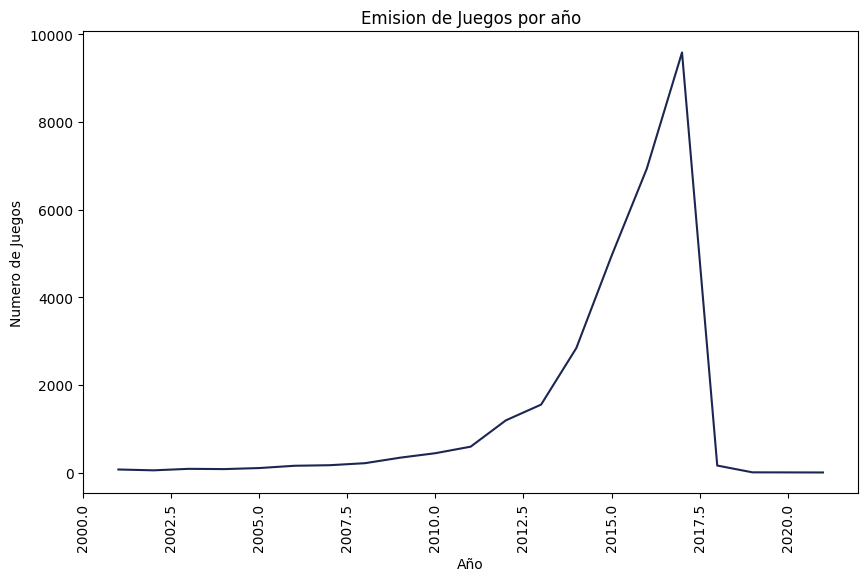

In [120]:
# Grafica lineal de  cantidad de juegos por año
plt.figure(figsize=(10, 6))
plt.plot(index, games_per_year, color='#1b2651')
plt.xticks(rotation='vertical')

# Indicar las etiquetas y el titulo
plt.xlabel('Año')
plt.ylabel('Numero de Juegos')
plt.title('Emision de Juegos por año')

**Conclusion**:
* Podemos concluir que la mayor concetracion de emision de juegos se realizo entre en el 2015 al 2017 dando su mayor punto en el 2017

**Pregunta 2:¿Cual porcentaje de juegos ofrecen early access?**

Text(0.5, 1.0, 'Porcentaje de Juegos que ofrecen Early Access')

<Figure size 1000x600 with 0 Axes>

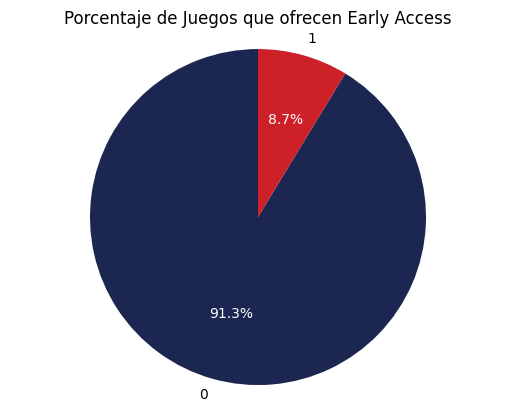

In [121]:
# Agrupar los valores y ordenando de menor a mayor
plt.figure(figsize=(10, 6))
cant_early=df_steam_games['early_access'].groupby(df_steam_games['early_access']).count()
early=df_steam_games['early_access'].unique()
colores = ["#1b2651", "#cd2028"]
sorted_cant_early, sorted_early = zip(*sorted(zip(cant_early,early), reverse=True))

# Crear el gráfico de pie
fig, piechart_3 = plt.subplots()
_, _, autopcts=piechart_3.pie(sorted_cant_early, labels=sorted_early, autopct='%1.1f%%', colors=colores,  startangle=90,textprops={'color': 'black'},pctdistance=0.6, labeldistance=1.1)
for autopct in autopcts:
    autopct.set_color('white')
# Ajustar el aspecto del gráfico, Para que el gráfico de pie sea circular y no se deforme
piechart_3.axis('equal')

# Agregar título
piechart_3.set_title('Porcentaje de Juegos que ofrecen Early Access', color='black')

**Conclusion**:
* Mas del 90% de los juegos no ofrecen early access.

**Pregunta 3:¿Cual es el genero con mayor cantidad de juegos en el mercado actual?**

In [122]:
gen_cant = pd.DataFrame(df_steam_games['genres'].value_counts())[0:10]

<Axes: xlabel='genres'>

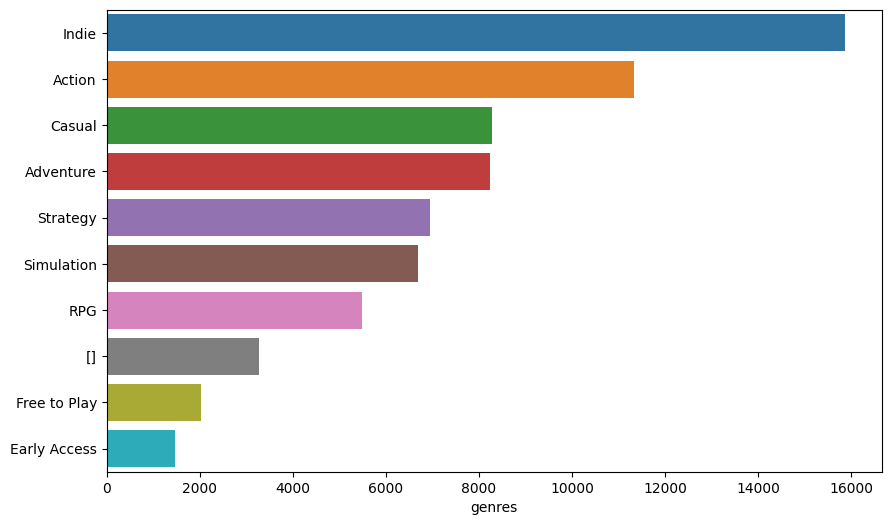

In [123]:
# Graficar el diagrama de barras de los generos más populares
plt.figure(figsize=(10, 6))
sns.barplot(gen_cant , y= gen_cant.index , x = 'genres')

**Conclusion**
* Observamos que casi 16000 juegos son indie es decir casi el 50% de los juegos presentes en steam ,sin embargo la categoria accion seria el genero con mayor

In [124]:
price_filter=df_steam_games[df_steam_games['price']<40]

**Pregunta 4:¿Cual es el precio promedio de los juegos?**

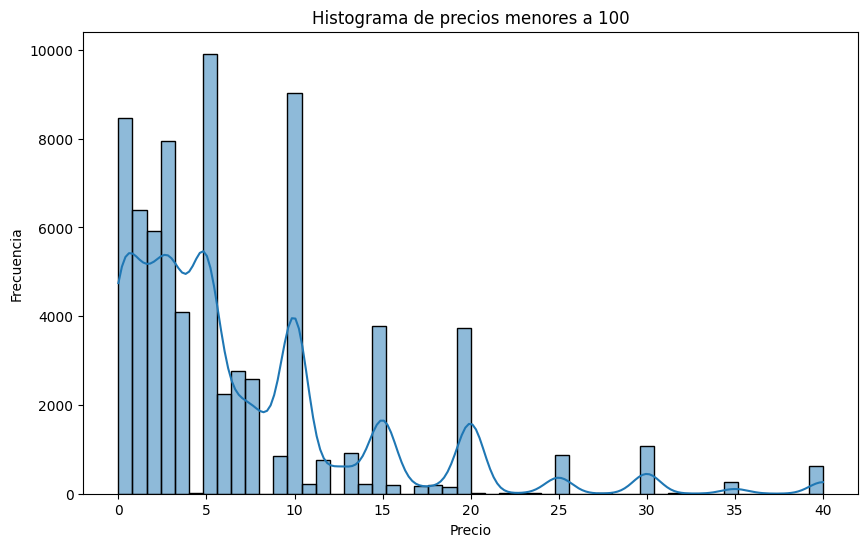

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(x='price', data=price_filter,bins=50,kde=True)
plt.xlabel('Precio')  # Agrega el nombre del eje x
plt.ylabel('Frecuencia')  # Agrega el nombre del eje y
plt.title('Histograma de precios menores a 100')  # Agrega el titulo

plt.show()

**Conclusion**:
* Se puede deducir del grafico que la moda de precios seria 5 y seguido por los juegos que cuestan 10


**Pregunta 5:¿Cual es el  precio promedio de los juegos?**

In [126]:
gen_cant.index

Index(['Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation',
       'RPG', '[]', 'Free to Play', 'Early Access'],
      dtype='object')

In [127]:
top10_gen=df_steam_games[df_steam_games['genres'].isin(gen_cant.index)]

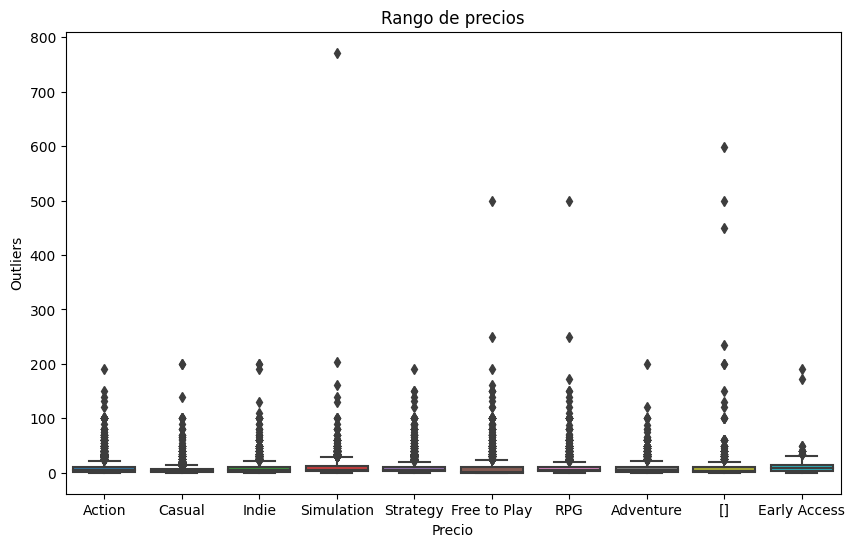

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='price',x='genres', data=top10_gen, orient='vertical')
plt.xlabel('Precio')  # Agrega el nombre del eje x
plt.ylabel('Outliers')  # Agrega el nombre del eje y
plt.title('Rango de precios')  # Agrega el titulo

plt.show()

### 5.2.EDA de items

In [129]:
df_user_items.head()

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_2weeks,playtime_forever
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,0,6
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,0,7
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0


**Variables**:
* **user_id**: Variable de tipo categorica que contiene el id del usuario
* **itens_count**: Variable de tipo numerica que contiene el numero de juegos que posee el usuario
* **steam_appid**: Variable de tipo categorica que contiene el id del juego
* **user_url**: Variable de tipo categorica que contiene la url del usuario
* **item_id**: Variable de tipo categorica que contiene el id del juego
* **item_name**: Variable de tipo categorica que contiene el nombre del juego
* **playtime_forever**: Variable de tipo numerica que contiene las horas/minutos de juego desde su compra
* **playtime_2weeks**: Variable de tipo numerica que contiene las horas/minutos de juego  las ultimas 2 semanas
* **item_name**: Variable de tipo categorica que contiene el nombre del juego


A primera vista podemos trabajar en el EDA en 4 graficos:
- Diagrama de barras Top 10 juego mas populares con mas tiempo de juego por siempre y por 2 semanas
- Diagrama de barras de los 10 jugadores con mas tiempo de juego
- Juego que fue  comprado mas veces


De este analisis inicial podremos tenener un mayor alcance de nuestro proyecto

**Pregunta 6:¿Cual son los 10 juegos mas jugados de siempre y en las ultimas 2 semanas**

In [130]:
mas_jugados_lifetime=df_user_items[['item_name','playtime_forever']].groupby(['item_name']).sum().sort_values(by='playtime_forever',ascending=False)[0:10]#Obtenemos los 10 juegos mas jugados de siempre

In [131]:
mas_jugados_2weeks=df_user_items[['item_name','playtime_2weeks']].groupby(['item_name']).sum().sort_values(by='playtime_2weeks',ascending=False)[0:10] #Obtenemos los 10 juegos mas jugados  en las ultimas 2 semanas

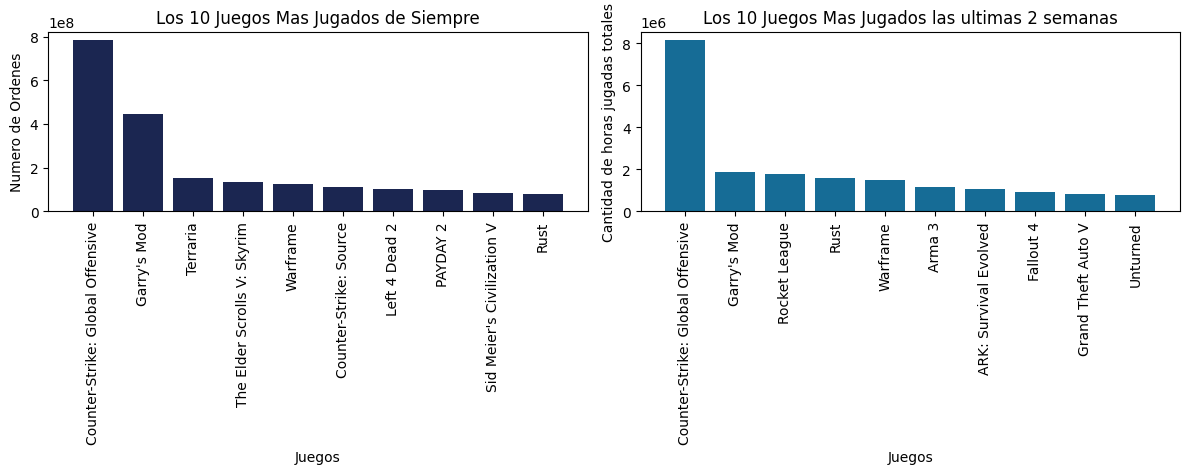

In [132]:
# Crear una figura y dos subplots en una sola fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficar de barras de los 10 juegos mas jugados de siempre

ax1.bar(x=mas_jugados_lifetime.index,height=mas_jugados_lifetime['playtime_forever'], color='#1b2651')
ax1.set_xticks(mas_jugados_lifetime.index)
ax1.set_xticklabels(mas_jugados_lifetime.index, rotation='vertical')
ax1.set_xlabel('Juegos')
ax1.set_ylabel('Numero de Ordenes')
ax1.set_title('Los 10 Juegos Mas Jugados de Siempre')


# Graficar de barras de los 10 juegos mas jugados en las ultimas 2 semanas

ax2.bar(x=mas_jugados_2weeks.index,height=mas_jugados_2weeks['playtime_2weeks'], color='#166c96')
ax2.set_xticks(mas_jugados_2weeks.index)
ax2.set_xticklabels(mas_jugados_2weeks.index, rotation='vertical')
ax2.set_xlabel('Juegos')
ax2.set_ylabel('Cantidad de horas jugadas totales')
ax2.set_title('Los 10 Juegos Mas Jugados las ultimas 2 semanas')

plt.tight_layout()
plt.show()




**Conclusion**
Se observa claramente que los juegos como Counter-Strike: Global Offensive y Garry's Mod son los mas jugados de siempre y las ultimas 2 semanas marcando una clara diferencia antes los otros juegos

### 5.3.EDA de reviews

In [133]:
df_user_reviews.head()

,user_id,user_url,item_id,recommend,review,Posted Date,Date last edited,funny review votes,Helpful review votes,total review votes,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,1,simple yet great replayability opinion zombie ...,2011-11-05,2011-11-05,0,0,0,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,1,unique worth playthrough,2011-07-15,2011-07-15,0,0,0,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,1,great atmosphere gunplay bit chunky times end ...,2011-04-21,2011-04-21,0,0,0,2
3,js41637,http://steamcommunity.com/id/js41637,251610,1,know think see title barbie dreamhouse party n...,2014-06-24,2014-06-24,0,15,20,2
4,js41637,http://steamcommunity.com/id/js41637,227300,1,simple actually not simple truck driving simul...,2013-09-08,2013-09-08,0,0,1,2


** Variables:**
* **user_id**: Variable de tipo categorica que contiene el id del usuario
* **user_url**: Variable de tipo categorica que contiene la url del usuario
* **item_id**: Variable de tipo categorica que contiene el id del juego
* **recommend**: Variable de tipo categorica que contiene si el usuario recomienda el juego
* **review**: Variable de tipo categorica que contiene el texto del review
* **Posted Date**: Variable de tipo categorica que contiene la fecha de publicacion del review
* **Date last edited**: Variable de tipo categorica que contiene la fecha de ultima edicion del review
* **funny review votes**: Variable de tipo categorica que contiene el numero de votos que consideran la review como divertida
* **helpful review votes**: Variable de tipo categorica que contiene el numero de votos que consideran la review como util
* **total review votes**: Variable de tipo categorica que contiene el numero de total de votos incluyen tanto como los que consideran utiles y cuales no.

A primera vista podemos trabajar en el EDA en 4 graficos:
- relacion de los votos de helful y total reviews de los comentarios
- tasa de recomendacion de los juegos


De este analisis inicial podremos tenener un mayor alcance de nuestro proyecto

**Pregunta 7:¿Cual es el ratio de consideracion como util respecto al total de los reviews**

In [134]:
df_user_reviews['ratio']=df_user_reviews['Helpful review votes']/df_user_reviews['total review votes']
df_user_reviews['ratio'].fillna(0,inplace=True)

In [135]:
df_user_reviews.head()

,user_id,user_url,item_id,recommend,review,Posted Date,Date last edited,funny review votes,Helpful review votes,total review votes,sentiment_analysis,ratio
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,1,simple yet great replayability opinion zombie ...,2011-11-05,2011-11-05,0,0,0,2,0.00
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,1,unique worth playthrough,2011-07-15,2011-07-15,0,0,0,2,0.00
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,1,great atmosphere gunplay bit chunky times end ...,2011-04-21,2011-04-21,0,0,0,2,0.00
3,js41637,http://steamcommunity.com/id/js41637,251610,1,know think see title barbie dreamhouse party n...,2014-06-24,2014-06-24,0,15,20,2,0.75
4,js41637,http://steamcommunity.com/id/js41637,227300,1,simple actually not simple truck driving simul...,2013-09-08,2013-09-08,0,0,1,2,0.00


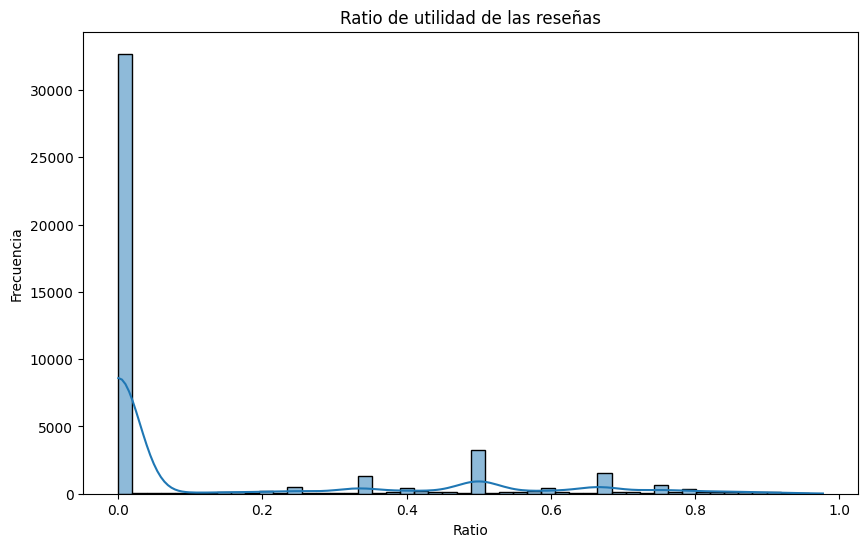

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(x='ratio', data=df_user_reviews[df_user_reviews['ratio']<1],bins=50,kde=True)
plt.xlabel('Ratio')  # Agrega el nombre del eje x
plt.ylabel('Frecuencia')  # Agrega el nombre del eje y
plt.title('Ratio de utilidad de las reseñas')  # Agrega el titulo

plt.show()

**Conclusion**
* Se observa claramente que las reseñas usualmente no se consideran utiles por lo general .

**Pregunta 8:¿Cual es el ratio de recomendacion de juegos de los reviews**

Text(0.5, 1.0, 'Los Usuarios Recomiendan Los Juegos Segun Sus Reviews')

<Figure size 1000x600 with 0 Axes>

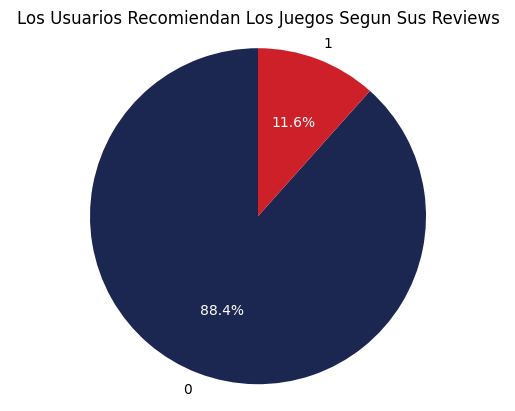

In [137]:
# Agrupar los valores y ordenando de menor a mayor
plt.figure(figsize=(10, 6))
cant_recommend=df_user_reviews['recommend'].groupby(df_user_reviews['recommend']).count()
recommend=df_user_reviews['recommend'].unique()
colores = ["#1b2651", "#cd2028"]
sorted_cant_recommend, sorted_recommend = zip(*sorted(zip(cant_recommend,recommend), reverse=True))

# Crear el gráfico de pie
fig, piechart_3 = plt.subplots()
_, _, autopcts=piechart_3.pie(sorted_cant_recommend, labels=sorted_recommend, autopct='%1.1f%%', colors=colores,  startangle=90,textprops={'color': 'black'},pctdistance=0.6, labeldistance=1.1)
for autopct in autopcts:
    autopct.set_color('white')
# Ajustar el aspecto del gráfico, Para que el gráfico de pie sea circular y no se deforme
piechart_3.axis('equal')

# Agregar título
piechart_3.set_title('Los Usuarios Recomiendan Los Juegos Segun Sus Reviews', color='black')

**Conclusión**:
* Se observa claramente que las reseñas usualmente no son positivas para los juegos que encontramos en steam y no recomiendan jugarlos


### 6.Funciones

En este espacio desarrollaremos las funciones solicitadas para nuestro MVP posteriormente se modificarán para poder agregarlas al deploy

* def **userdata( User_id : str )**: Debe devolver cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items.

In [138]:
def userdata(User_id: str):

  """
  La función recibirá un id de usuario y aplicándolo devolverá la cantidad de
  dinero gastado junto al porcentaje de recomendaciones: siguiendo los siguientes
  pasos:

  - Primero con el user_id buscamos en la tabla df_user_items los juegos del
  usuario los cuales serán guardados en la variable "games"
    games = df_user_items[df_user_items['user_id'] == User_id]['item_id']
    games = games.tolist()
    spend_money = 0.0

  - Segundo se convertimos a una lista para poder calcular la cantidad de dinero
   gastado basado en la columna price de los juegos
    for game in games:
      price_games = df_steam_games.loc[df_steam_games['id'] == game, 'price']
      if not price_games.empty:
        price = price_games.values[0]
        spend_money += float(price)

  serán extraídos de la df_steam_games el cual sumara a nuestra variable llamada
   "spend_money".

  - Tercero contamos la cantidad de juegos totales de nuestro usuario.
    cant_games = df_user_items[df_user_items['user_id'] == User_id].shape[0]

  - Cuarto sumamos las recomendaciones totales de nuestro usuario.
    recomendations = df_user_reviews['recommend'][df_user_reviews['user_id']==user].sum()

  - Quinto calculamos el porcentaje
  ratio = recomendations/cant_games
  """

  #Paso 1
  games = df_user_items[df_user_items['user_id'] == User_id]['item_id']
  games = games.tolist()
  spend_money = 0.0

  #Paso 2
  for game in games:
      price_games = df_steam_games.loc[df_steam_games['id'] == game, 'price']
      if not price_games.empty:
        price = price_games.values[0]
        spend_money += float(price)

  #Paso 3
  cant_games = df_user_items[df_user_items['user_id'] == User_id].shape[0]

  #Paso 4
  recomendations = df_user_reviews['recommend'][df_user_reviews['user_id']==User_id].sum()

  #Paso 5
  ratio = recomendations/cant_games
  return f'{spend_money}:{round(ratio*100,2)}'

* def **countreviews( YYYY-MM-DD y YYYY-MM-DD : str )**: Cantidad de usuarios que realizaron reviews entre las fechas dadas y, el porcentaje de recomendación de los mismos en base a reviews.recommend.

In [139]:
def countreviews(fecha_inicio:str, fecha_fin:str):

  """

  La función recibirá 2 datos tipo fecha de los cuales 1el primer de ellos significa
  el fecha de inicio y el segundo el de fin el retorno es la cantidad de usuarios
  que realizaron reviews entre las fechas dadas y, el porcentaje de recomendación
  de los mismos en base a la columna reviews.recommend.

  En esta función se seguirán los siguientes pasos:

  - Primero obtenemos los usuarios entre las fechas dadas, se usará una máscara
  en la tabla df_user_reviews y se extraerá los registros únicos es decir los id
  de los jugadores

  users = df_user_reviewss[(df_user_reviews['Posted Date'] >= fecha_inicio) &
                      (df_user_reviews['Posted Date'] <= fecha_fin)]['user_id'].unique()

  - Segundo obtenemos las recomendaciones positivas en este caso se usará la columna
  recommend de la tabla df_user_reviews para nuestra función manejaremos la función
  sum porque nuestros valores oscilan entre 1 para positivos y 0 para negativos
  entonces sería un filtro menos a usar
    positive = df_user_reviews[(df_user_reviews['Posted Date'] >= fecha_inicio) &
                    (df_user_reviews['Posted Date'] <= fecha_fin)] ['recommend'].sum(

  - Tercero calcularemos el total de recomendaciones tanto negativas como positivas
  por tanto usaremos la función count en la columna recomend de la tabla
  df_user_reviews.

  total_recommend = df_user_reviews[(df_user_reviews['Posted Date'] >= fecha_inicio) &
                    (df_user_reviews['Posted Date'] <= fecha_fin)]['recommend'].count()

  -Finalmente procederemos a calcular el porcentaje de recomendaciones positivas
  sobre el total de recomendaciones
  if total_recommend == 0:
    percentage = 0
  else:
    percentage = positive/total_recommend

  """

  #Paso 0
  fecha_inicio=datetime.datetime.strptime(fecha_inicio,'%Y-%m-%d')
  fecha_fin=datetime.datetime.strptime(fecha_fin,'%Y-%m-%d')

  #Paso 1
  users = df_user_reviews[(df_user_reviews['Posted Date'] >= fecha_inicio) &
                      (df_user_reviews['Posted Date'] <= fecha_fin)]['user_id'].unique()

  #Paso 2
  positive = df_user_reviews[(df_user_reviews['Posted Date'] >= fecha_inicio) &
                    (df_user_reviews['Posted Date'] <= fecha_fin)] ['recommend'].sum()

  #Paso 3
  total_recommend = df_user_reviews[(df_user_reviews['Posted Date'] >= fecha_inicio) &
                    (df_user_reviews['Posted Date'] <= fecha_fin)]['recommend'].count()

  #Paso 4
  if total_recommend == 0:
    percentage = 0
  else:
    percentage = positive/total_recommend

  return f'{len(users)} : {round(percentage,2)*100}%'

* def **genre( género : str )**: Devuelve el puesto en el que se encuentra un género sobre el ranking de los mismos analizado bajo la columna PlayTimeForever.

In [140]:
def genre(genero: str):

  """

  La función recibirá 1 datos tipo str de genero el returno de esta funcion es
  el puesto en el que se encuentra un género sobre el ranking de los mismos
  analizado bajo la columna PlayTimeForever.


  En esta función se seguirán los siguientes pasos:

  - Primero obtenemos una serie con todos los generos presentes en la tabla df_steam_games
  y lo guardamos en **unique_genres** e instanciamosla variable **genre_sum** lo
  creamos como diccionario

  unique_genres = df_steam_games['genres'].unique()
  genre_sum = {}

  - Segundo iteraremos  cada genero de unique_genres y obtenemos los juegos de este
  genero los cuales los guardaremos en una lista a continuación procederemos a buscar
  en la tabla df_user_items los juegos del usuario los cuales serán guardados en
  la variable "list_games" y obtenemos el playtime_forever y finalmente guardarlo
   en el diccionario genre_sum

  for genre in unique_genres:
    list_games = df_steam_games[df_steam_games['genres'] == genre]['id'].drop_duplicates().tolist()
    playtime_genre = df_user_items.loc[df_user_items['item_id'].isin(list_games)]['playtime_forever'].sum()
    genre_sum[genre] = playtime_genre

  - Tercero procederemos a guardar el ranking de generos en la variable sorted_genres_sum
  teniendo como referencia la cantidad de horas jugadas

  sorted_genres_sum = dict(sorted(genre_sum.items(), key=lambda item: item[1], reverse=True))
  ranking = list(sorted_genres_sum.keys()).index(genero) + 1

  """

  #Paso 1
  unique_genres = df_steam_games['genres'].unique()
  genre_sum = {}

  #Paso 2
  for genre in unique_genres:
    list_games = df_steam_games[df_steam_games['genres'] == genre]['id'].drop_duplicates().tolist()
    playtime_genre = df_user_items.loc[df_user_items['item_id'].isin(list_games)]['playtime_forever'].sum()
    genre_sum[genre] = playtime_genre

  #Paso 3
  sorted_genres_sum = dict(sorted(genre_sum.items(), key=lambda item: item[1], reverse=True))
  ranking = list(sorted_genres_sum.keys()).index(genero) + 1

  return f'{genero} : {ranking}' # Retornamos

* def **userforgenre( género : str )**: Top 5 de usuarios con más horas de juego en el género dado, con su URL (del user) y user_id.

In [ ]:
def userforgenre( género : str ):
  """
  La función recibirá 1 datos tipo str con el nombre de una compañia el retorno
  es la cantidad de items y porcentaje de contenido Free por año según empresa
  desarrolladora. Ejemplo de salida:
  """
  return 0

* def **developer( desarrollador : str )**: Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora. Ejemplo de salida:
- Activision
- Año	Contenido Free
- 2023	27%
- 2022	25%
- xxxx	xx%

In [142]:
def developer(company_name: str):

  """
  La función recibirá 1 datos tipo str con el nombre de una compañia el retorno
  es la cantidad de items y porcentaje de contenido Free por año según empresa
  desarrolladora. Ejemplo de salida:

  -El paso 1 extraeremos los juegos que son gratis de la compañia dada y los guardaremos
  en una variable llamada 'free_games' .posteriormente la agruparemos por año

  free_games = df_steam_games[(df_steam_games['publisher'] == company_name) & (df_steam_games['price'] == 0) ].drop_duplicates(subset=['id'])
  free_games = free_games.groupby('year')['app_name'].nunique()

  -El paso 2 extraeremos el total de juegos de esa compañia y los guardaremos en
  una variable llamada 'all_games' .posteriormente la agruparemos por año

  all_games = df_steam_games[df_steam_games.publisher == company_name].groupby('year')['app_name'].nunique()

  -El paso 3 Crearemos la variable ratio_matrix que contendrqa la relacion entre
  el total de juegos gratis y el total de juegos de esa compañia

  -El paso 4 Creamos la variable answer que contendra la tabla para esta ocasion
  nos facilitamos de html para su visualización


  """

  # Paso 1
  free_games = df_steam_games[(df_steam_games['publisher'] == company_name) & (df_steam_games['price'] == 0) ].drop_duplicates(subset=['id'])
  free_games = free_games.groupby('year')['app_name'].nunique()

  # Paso 2
  all_games = df_steam_games[df_steam_games.publisher == company_name].groupby('year')['app_name'].nunique()

  #Paso 3
  ratio_matrix = (free_games/all_games)

  # Paso 4
  answer = f'<p>| {company_name} | | |</p><p>|-----|---------------------|</p><p>| Año | Contenido Free |</p>'
  for year, percentage in ratio_matrix.items():
      answer += f"<p>| {year} | {percentage*100:.0f}% |</p>"
  return answer

* def sentiment_analysis( año : int ): Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento.

                    Ejemplo de retorno: {Negative = 182, Neutral = 120, Positive = 278}

In [144]:
def sentiment_analysis( año : int ):

  """

  La función recibirá 1 datos tipo int correspondiente al año  el retorno
  devuelve una lista con la cantidad de registros de reseñas de usuarios que se
  encuentren categorizados con un análisis de sentimiento.
  - Primero obtenemos los datos de nuestro año

  reviews_per_year = df_user_reviews[df_user_reviews['year'] == año]

  -Segundo intercambiamos los valores asignados anteriomente como resultado del
  analisis de sentimiento

  replace_values = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

  -Tercero contamos la cantidad de calificacion de sentimiento de las opiniones

  sentiment_resume = reviews_per_year['sentiment_analysis'].map(replace_values).value_counts().to_dict()

  """
  reviews_per_year = df_user_reviews[df_user_reviews['year'] == año]
    # Coseguimos los datos de nuestro año
  replace_values = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    # Mapeamos los sentimientos con su respectiva palabra
  sentiment_resume = reviews_per_year['sentiment_analysis'].map(replace_values).value_counts().to_dict()
    # Contamos esos sentimientos
  return f'{sentiment_resume}'

## 7.Sistema de Recomendacion

### **cosine_similarity o coseno de similitud**

En realidad, comparar el grado de similitud entre juegos puede que no sea lo que más interese al usuario. Puede ser más valioso encontrar todas aquellas juegos que son más parecidas a la que nos gusta. Para ello, seleccionaremos la columna de juegos que nos gusta y la ordenaremos de mayor a menor. Así, Python nos mostrará en orden decreciente de similitud los juegos .
Por eso usaremos el modelo de coseno de similitud

### 7.1.Cargando las librerías necesarias

In [179]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

### 7.2.Carga de datos

In [170]:
Sis_recomendacion=df_steam_games[['app_name','genres']].drop_duplicates(['app_name']).dropna()

In [171]:
Sis_recomendacion=Sis_recomendacion.reset_index()


In [172]:
Sis_recomendacion

,index,app_name,genres
0,88310,Lost Summoner Kitty,Action
1,88311,Ironbound,Free to Play
2,88312,Real Pool 3D - Poolians,Casual
3,88313,弹炸人2222,Action
4,88314,Log Challenge,[]
...,...,...,...
32089,120440,Colony On Mars,Casual
32090,120441,LOGistICAL: South Africa,Casual
32091,120442,Russian Roads,Indie
32092,120443,EXIT 2 - Directions,Casual


### 7.3.Preparacion del modelo

#### 7.3.1.Aplicando TfidfVectorizer

In [180]:
tfidfvec=TfidfVectorizer(min_df=2,max_df=0.7,token_pattern=r'\b[a-zA-Z]\w+\b', stop_words='english')

In [174]:
data_vectorizado=tfidfvec.fit_transform(Sis_recomendacion['genres'])

In [175]:
data_vectorizado_df=pd.DataFrame(data_vectorizado.toarray(),index=Sis_recomendacion['app_name'],columns=tfidfvec.get_feature_names_out())

data_vectorizado_df

,access,accounting,action,adventure,amp,animation,audio,casual,design,early,...,racing,rpg,simulation,software,sports,strategy,training,utilities,video,web
app_name,,,,,,,,,,,,,,,,,,,,,
Lost Summoner Kitty,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ironbound,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Real Pool 3D - Poolians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
弹炸人2222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Log Challenge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Colony On Mars,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOGistICAL: South Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Russian Roads,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
vector_similitud_coseno=cosine_similarity(data_vectorizado_df.values)

In [178]:
cos_sim_games=pd.DataFrame(vector_similitud_coseno,index=Sis_recomendacion['app_name'],columns=Sis_recomendacion['app_name'])
cos_sim_games

app_name,Lost Summoner Kitty,Ironbound,Real Pool 3D - Poolians,弹炸人2222,Log Challenge,Battle Royale Trainer,SNOW - All Access Basic Pass,SNOW - All Access Pro Pass,SNOW - All Access Legend Pass,Race,...,The spy who shot me™,Raining blocks,Bravium,BAE 2,Kebab it Up!,Colony On Mars,LOGistICAL: South Africa,Russian Roads,EXIT 2 - Directions,Maze Run VR
app_name,,,,,,,,,,,,,,,,,,,,,
Lost Summoner Kitty,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Ironbound,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Real Pool 3D - Poolians,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
弹炸人2222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Log Challenge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Colony On Mars,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
LOGistICAL: South Africa,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
Russian Roads,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
